In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv("insurance.csv")
df.head(10)


,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df.mode()

,age,gender,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['gender', 'smoker', 'region'], dtype='object')

In [25]:
df1 = df.copy()
df1.head(5)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
for column in categorical_cols:
   unique_values = df1[column].unique()
   n = len(unique_values) #number of unique values
   replacement_values = list(range(1, n+1))
   df1[column] = df1[column].replace(unique_values, replacement_values)

df1.head(5)    

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


In [28]:
dflabel = df.copy()
dflabel.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [32]:
le = LabelEncoder()

for column in categorical_cols:
   dflabel[column] = le.fit_transform(dflabel[column])

dflabel.head(5)

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [33]:
dfoe = df.copy()
dfoe.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [34]:
for column in categorical_cols:
   ode = OrdinalEncoder(categories=[dfoe[column].unique()])
   dfoe[column] = ode.fit_transform(dfoe[[column]])
    
dfoe.head(3)  

,age,gender,bmi,children,smoker,region,charges
0,19,0.0,27.90,0,0.0,0.0,16884.9240
1,18,1.0,33.77,1,1.0,1.0,1725.5523
2,28,1.0,33.00,3,1.0,1.0,4449.4620


In [35]:
dfoh = df.copy()
dfoh.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [40]:
dflabel.corr()
   

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

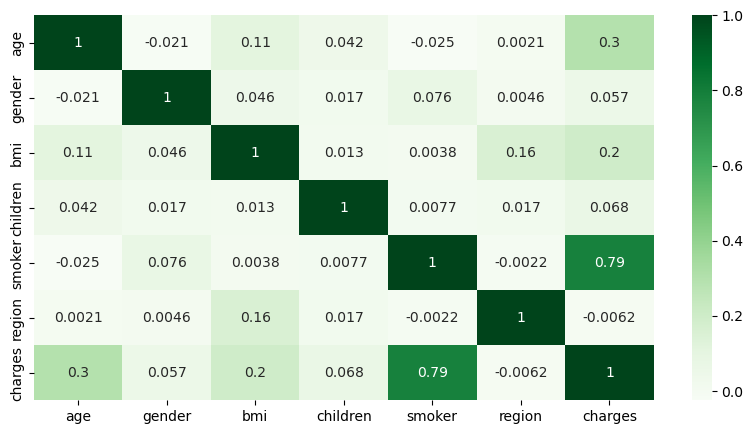

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(dflabel.corr(), annot=True, cmap="Greens")